# Exploratory Data Analysis (EDA)

In [1]:
# General imports
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1. Introduction

We will now conduct an inital Exploratory Data Analyis and Visualization to get a feel for the data before moving on to Feature Engineering.

### 1.1 Loading Dataset

First, let's load the data and walk through the columns first.
<br> Note that we only look at the traning data to avoid **data leakage**.

In [2]:
df = pd.read_csv(r'C:\Users\gustm\Desktop\cleaned_training_set_apartments.csv')

In [3]:
df.head()

,Address,District,Price,Living Area,Side Area,Rooms,Monthly Fee,Floor,Year of Building,Elevator,Balcony,Patio,Fireplace,Date of Sale,Days for Sale,Latitude,Longitude
0,Tellusgången 34,Telefonplan,4770000,73.0,0.0,3.0,5026,5.0,2015.0,1,1,0,0,2024-05-22,13,59.298699,17.989062
1,Tångvägen 31,Hökmossen,2600000,57.0,0.0,2.0,4297,NaN,1944.0,0,0,0,0,2024-02-24,15,59.292110,17.994688
2,Cedergrensvägen 43,LM-Staden,3745000,51.0,0.0,3.0,4285,1.0,1940.0,0,0,0,0,2024-04-30,9,59.300796,17.998543
3,Responsgatan 12,Telefonplan,2760000,46.0,0.0,2.0,3135,3.0,2019.0,1,1,0,0,2024-03-18,16,59.296459,18.002712
4,Mikrofonvägen 21,Telefonplan,4400000,61.0,0.0,2.0,3676,4.0,2010.0,1,1,0,0,2024-08-18,10,59.296911,17.999793


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           380 non-null    object 
 1   District          380 non-null    object 
 2   Price             380 non-null    int64  
 3   Living Area       380 non-null    float64
 4   Side Area         380 non-null    float64
 5   Rooms             379 non-null    float64
 6   Monthly Fee       380 non-null    int64  
 7   Floor             353 non-null    float64
 8   Year of Building  360 non-null    float64
 9   Elevator          380 non-null    int64  
 10  Balcony           380 non-null    int64  
 11  Patio             380 non-null    int64  
 12  Fireplace         380 non-null    int64  
 13  Date of Sale      380 non-null    object 
 14  Days for Sale     380 non-null    int64  
 15  Latitude          380 non-null    float64
 16  Longitude         380 non-null    float64
dt

### 1.2 Highlights of Tasks in this Notebook

- Explaining features
- Visualizing features
- Examining correlations 

## 2. Column Explanations

### 2.1 Address

These are the street addresses belonging to the area of Midsommarkransen, in Hägersten, Stockholm

### 2.2 District

The number indicates the minor district within Midsommarkransen. These names are taken from informal and/or names that people living in the area feels they belong to and use.

- 1 - LM-Staden
- 2 - Hökmossen
- 3 - Telefonplan
- 4 - Midsommarkransen
- 5 - Gamla Midsommarkransen (*Transl. "Old Midsommarkransen".
<br> The first buildings that were built in Midsommarkransen.
<br> They are located within the district Midsommarkransen and highly sought after.

### 2.3 Price

These are the end prices, in SEK (Swedish Krona) for the real estate objects. This will serve as our labeled data or *target*.

### 2.4 Living area

The main living area [in m<sup>2</sup>]

### 2.5 Side Area

An area with a room height of less than 190 cm. Not deemed to be included in the main living area. 

### 2.6 Rooms

Total number of rooms in the apartment.

### 2.7 Monthly Fee

A monthly fee that all apartments pay to the condominium organsiation that all apartments make up together. This fee will be used for maintenence and rebuilding of common yards as well as paying off loans that the condominium organsiation have.

### 2.8 Floor

The floor, or level, number. 

### 2.9 Age of Building

The age of the building that the apartment is located in.

### 2.10 Elevator/Balcony/Patio/Fireplace

Is there an Elevator/Balcony/Patio/Fireplace in the building? (1 - True, 0 - False)

### 2.11 Subway Station/Grocery Store/Gym/Bakery

The shortest distance to a Subway Station/Grocery Store/Gym/Bakery.

## 3. Descriptive Statistics of Training Set

In [5]:
# Note that Date of Sale is an object and has lost its DateTime datatype
df['Date of Sale'] = pd.to_datetime(df['Date of Sale'], format='%Y-%m-%d')

In [6]:
df.describe() 

,Price,Living Area,Side Area,Rooms,Monthly Fee,Floor,Year of Building,Elevator,Balcony,Patio,Fireplace,Date of Sale,Days for Sale,Latitude,Longitude
count,3.800000e+02,380.000000,380.000000,379.000000,380.000000,353.000000,360.000000,380.000000,380.000000,380.000000,380.000000,380,380.000000,380.000000,380.000000
mean,3.760507e+06,51.123684,0.503947,2.200528,3673.150000,2.467422,1970.886111,0.471053,0.510526,0.042105,0.044737,2024-05-08 18:00:00.000000256,34.757895,59.299383,18.002256
min,1.700000e+06,22.000000,0.000000,1.000000,1707.000000,-1.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,2024-01-02 00:00:00,0.000000,59.290327,17.988149
25%,2.707500e+06,37.000000,0.000000,2.000000,2820.750000,1.000000,1940.000000,0.000000,0.000000,0.000000,0.000000,2024-03-12 12:00:00,10.000000,59.297530,17.997867
50%,3.100000e+06,46.000000,0.000000,2.000000,3411.000000,2.000000,1944.000000,0.000000,1.000000,0.000000,0.000000,2024-05-08 12:00:00,13.000000,59.299962,18.002455
75%,4.303750e+06,61.000000,0.000000,2.500000,4285.000000,3.000000,2012.000000,1.000000,1.000000,0.000000,0.000000,2024-07-01 00:00:00,32.000000,59.301624,18.006246
max,1.210000e+07,134.000000,46.000000,5.000000,8284.000000,10.000000,2023.000000,1.000000,1.000000,1.000000,1.000000,2024-09-12 00:00:00,470.000000,59.304204,18.015493
std,1.611792e+06,18.869688,3.886158,0.763347,1142.662389,1.357194,38.715602,0.499819,0.500548,0.201094,0.206998,NaN,62.045386,0.003022,0.006312


- We can see that `Price` ranges from 1 700 000 SEK (ca \\$170,000) to 12 100 000 SEK (ca \\$1,200,000). 
- The `Living Area` ranges from 22 m<sup>2</sup> to 134 m<sup>2</sup>.
- The amount of `Rooms` (excluding a kitchen and bathrooms) ranges from 1 to 5 rooms.
- The `Monthly Fee` ranges from 1 707 SEK (ca \\$170) to 8284 SEK (ca \\$830).
- The `Floors` ranges from -1 to 10.
- The `Year of Building` ranges from 1910 and 2023.
- `Date of Sale` ranges from 2024-01-02 to 2024-09-12.
- The range for `Days for Sale` is from 0 to 470 days, with a mean value of 34 days.

## 4. Visualizing Data

Let's define a visualization function.

### 4.1 Defining Visualization Function

In [7]:
def plot_feature_hist_box(df, Feature):
    # Create a figure with a GridSpec to place the histogram and boxplot side by side
    fig = plt.figure(figsize=(12, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

    # Plot the histogram
    ax0 = plt.subplot(gs[0])
    ax0.hist(df[Feature].dropna(), bins=20, edgecolor='k', alpha=0.7)
    ax0.set_title(f'Histogram of {Feature}')
    ax0.set_xlabel(Feature)
    ax0.set_ylabel('Frequency')

    # Plot the boxplot
    ax1 = plt.subplot(gs[1])
    ax1.boxplot(df[Feature].dropna(), vert=True)
    ax1.set_title(f'Box Plot of {Feature}')
    ax1.set_ylabel(Feature)
    ax1.set_xticks([])  # Hide x-axis labels for the boxplot

    # Adjust layout
    plt.tight_layout()
    plt.show()


### 4.2 District

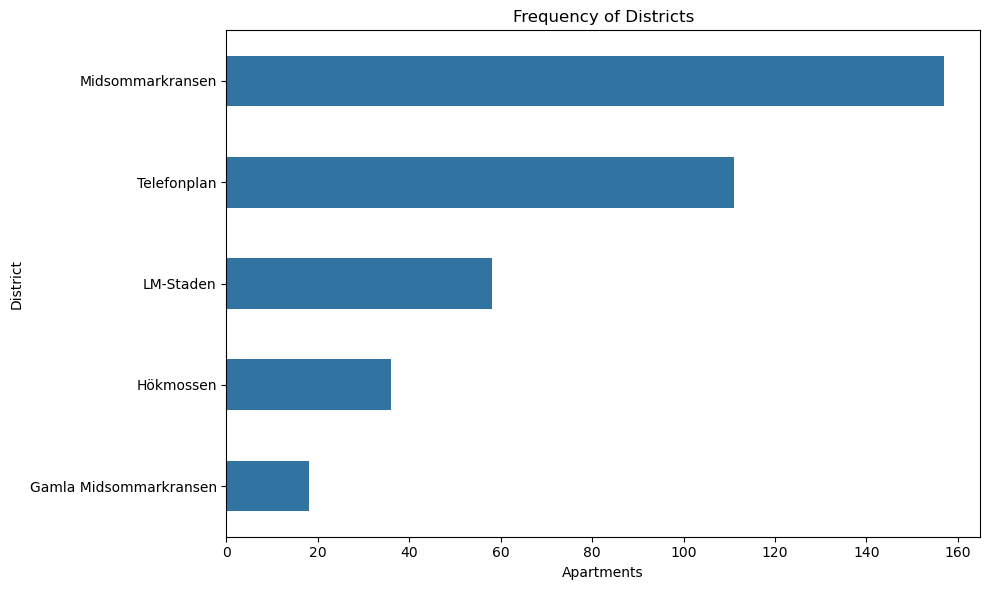

In [8]:
# Set up figure size
plt.figure(figsize=(10, 6))

# Horizontal bar plot with smaller bars
sns.countplot(data=df, y='District', order=df['District'].value_counts().index, linewidth=1, width=0.5)

# Title and labels
plt.title('Frequency of Districts')
plt.xlabel('Apartments')
plt.ylabel('District')

# Display the plot
plt.tight_layout()
plt.show()


**Comment**
<br> `District` is a categorical or qualitative feature rather than a true numerical one.
<br> Thus, distribution doesn't really matter here, since it matters on what label we assign each `District` within Midsommarkransen.
<br> What we see though, is that most of the apartments sold during is located in 'Midsommarkransen', exclusive 'Gamla Midsommarkransen'.
<br> After that we have 'Telefonplan' before 'LM-Staden' and then, 'Hökmossen'.
<br> Finally, we have 'Gamla Midsommarkransen', which as actually located in the `District` 'Midsommarkransen'.

### 4.3 Price

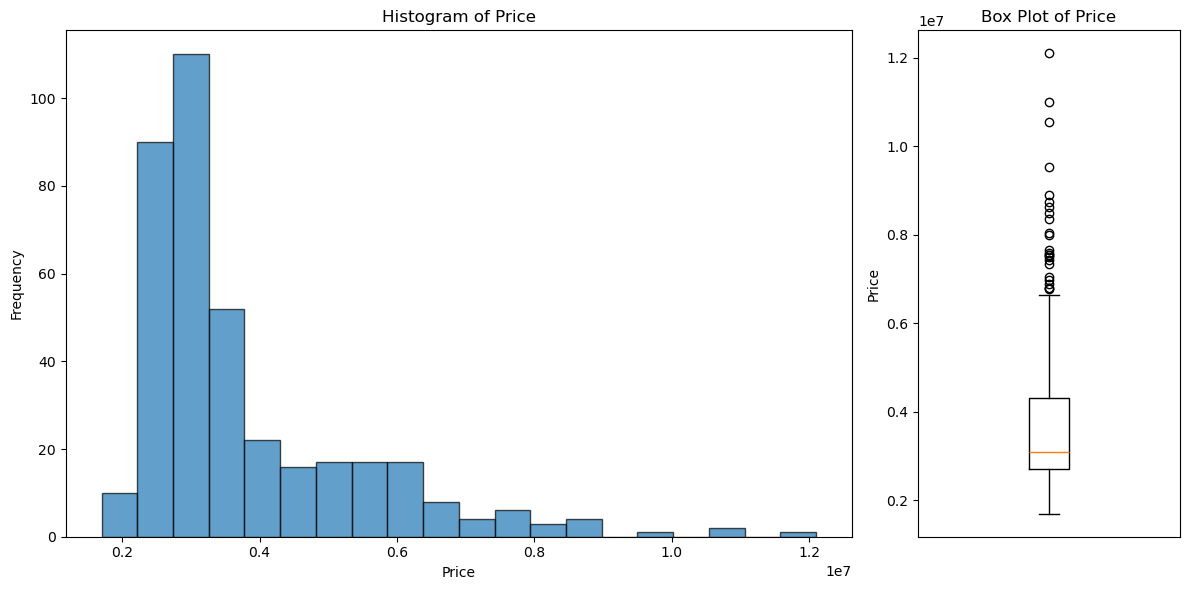

In [9]:
plot_feature_hist_box(df, 'Price')

**Comment**
<br> The distribution for `Price` is positively skewed as we mostly have apartments with lower price. 
<br> The median `Price` being around 3 000 000 SEK (ca 300,000 USD). We can see some outliers in the boxplot.

<br> It should be noted however that, with domain knowledge, it is safe to say that there exists quite a strong positive correlation between `Living Area` and `Price`, i.e. the greater the apartment, the more it costs.
<br> We also expect to see a strong positive correlation between `Living Area` and `Rooms`, since the more rooms you have the larger the apartment tends to be.
<br> Furthermore, we also expect a positive correlation between `Living Area` and `Monthly Fee`, since apartments pay their share to the condominium organisation's need to finance their joint loans. 
<br> For example, if a condominium organisation is made up by 5 apartments of the same size, then they would each pay 20% of what is needed. 
<br> But since condominium organisations are set up consisting of one or many houses with a difference in size for apartments, each apartment payes a `Monthly Fee` representing its share of area of the condominium organsiation's total size. 
<br> Thus, we expect to see a positive correlation between the `Living Area` and `Monthly Fee`. 

<br> Therefore, what we will see is features being dependent on each other and having a strong correlation between them. 
<br> This is called ***multicollinearity*** and may be porblematic for the ML model. 
<br> We will later see how we will deal with it, if or when necessary.

### 4.4 Living Area

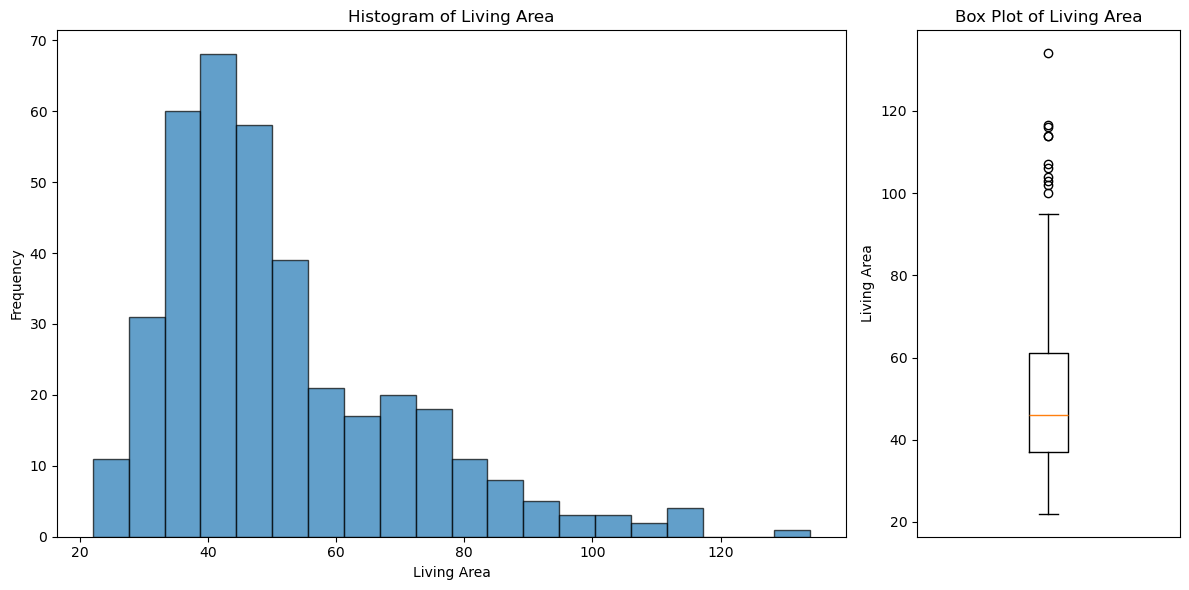

In [10]:
plot_feature_hist_box(df, 'Living Area')

**Comment**
<br> The distribution for `Living Area` is positively skewed as we mostly have apartments with a low area. 
<br> The median area is around 45 m<sup>2</sup>. We can see some outliers in the boxplot.
<br> The distribution is very similar to `Price`, which reinforces the belief of a strong positive correlation between the two features.

### 4.5 Side Area

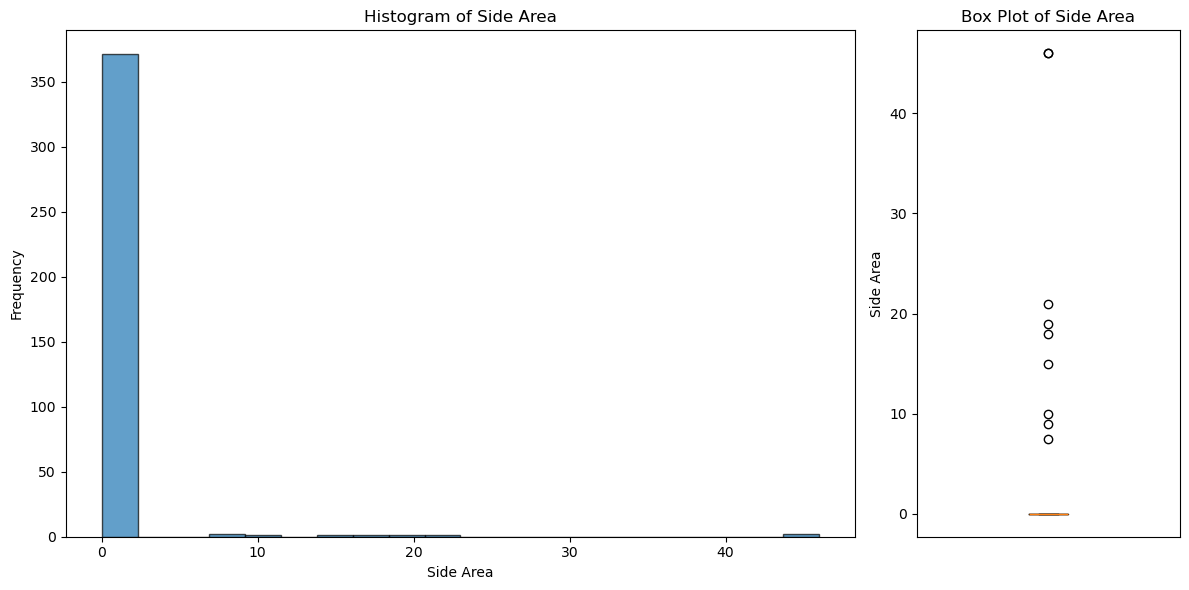

In [11]:
plot_feature_hist_box(df, 'Side Area')

**Comment**
<br> We can clearly see that most apartments do *not* have a `Side Area`, resulting in only a few outliers. 

### 4.6 Rooms

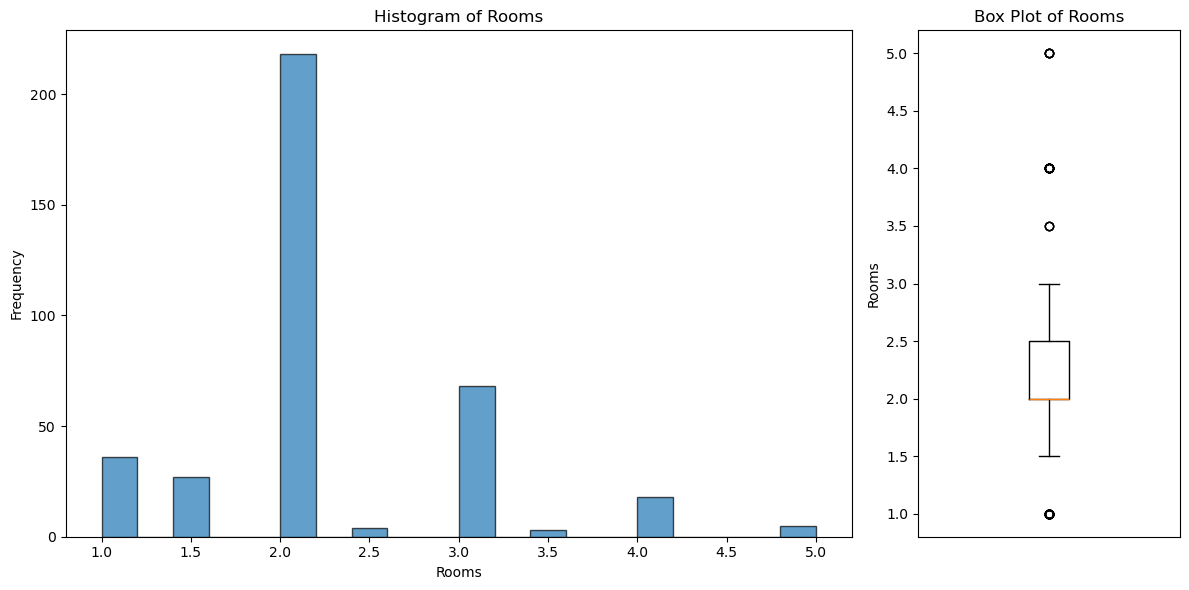

In [12]:
plot_feature_hist_box(df, 'Rooms')

**Comment**
<br> We can see a slight positive skew of the distribution of `Rooms`. 
<br> A majority of the apartments have 2 `Rooms`.

### 4.7 Monthly Fee

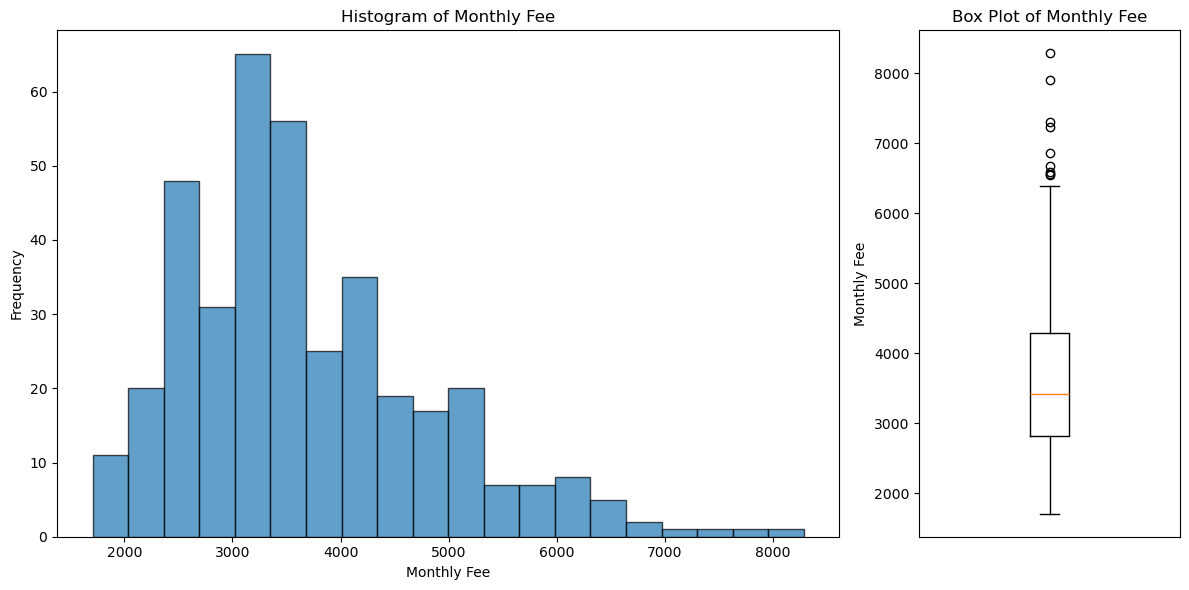

In [13]:
plot_feature_hist_box(df, 'Monthly Fee')

**Comment**
<br> Again, we can see a positively skewed distribution of data. 
<br> This time, it is `Monthly Fee`. 
<br> The median `Monthly Fee` is around 3 500 SEK (ca 350 USD).
<br> The positive correlation, mentioned before, with `Price` and `Living Area` and in some way `Rooms` seems to exist. 

### 4.8 Floor

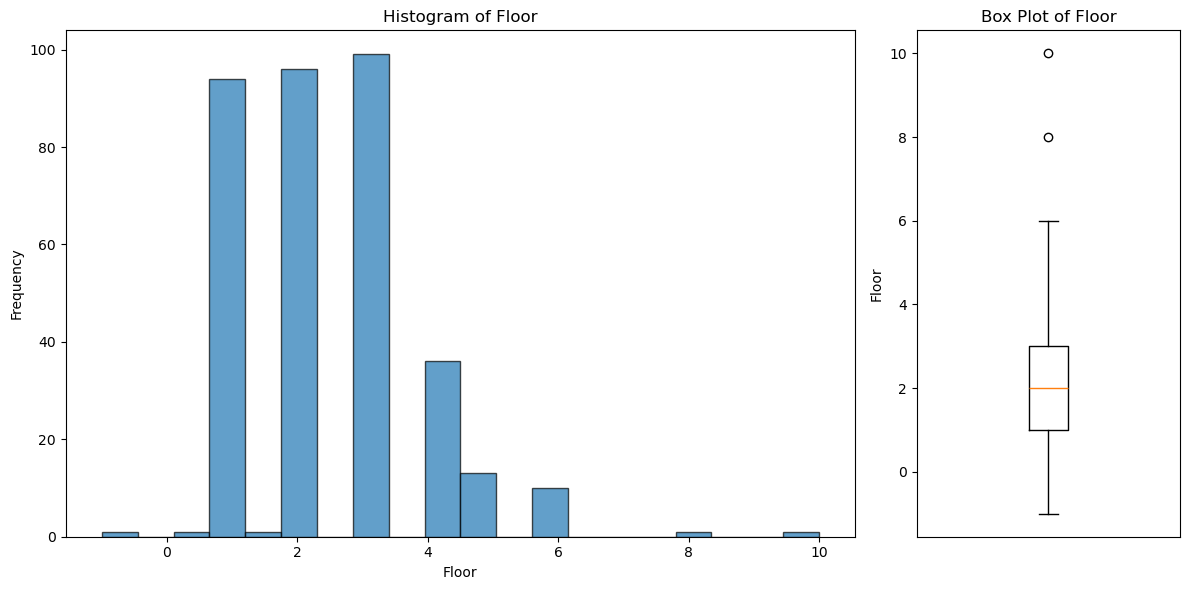

In [14]:
plot_feature_hist_box(df, 'Floor')

**Comment**
<br> We have a positively skewed distribution with apartments on `Floor` 1, 2, and 3 (medium at 2 dominating. 
<br> This is not surprising since we have a lot of buildings with a maximum of three `Floor`s (low-rise buildings). 
<br> This also results in a few outliers which are apartments in newer mid-rise (5-9 `Floor`s and high-rise buildings (10+ `Floor`s).
<br> Here, there shouldn't be an obvious correlation between `Floor`and `Living Area`.

### 4.9 Year of Building

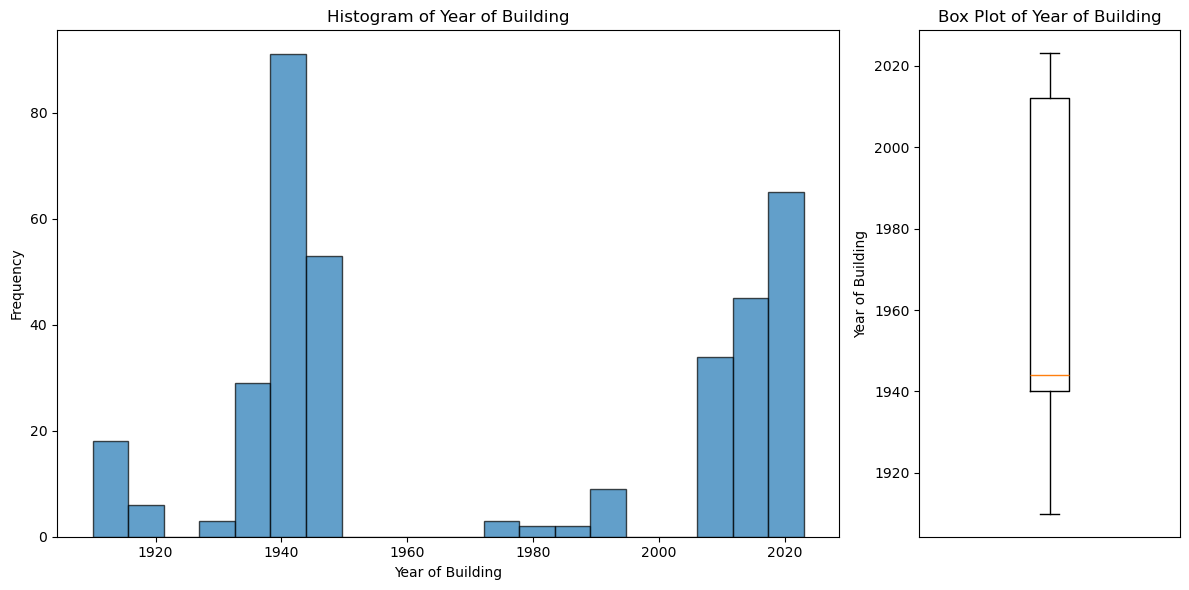

In [15]:
plot_feature_hist_box(df, 'Year of Building')

**Comment**
<br> We could almost speak of a bimodal distribution here, before and after 1960. 
<br> We had an initial building period when Midsommarkransen was founded about 100-110 yeas ago.
<br> The median `Year of Building` is about 1945.
<br> The latest building period began around 2005 and has accelerated, it seems.
<br> A bimodal distribution may become a problem later on.

### 4.10 Elevator

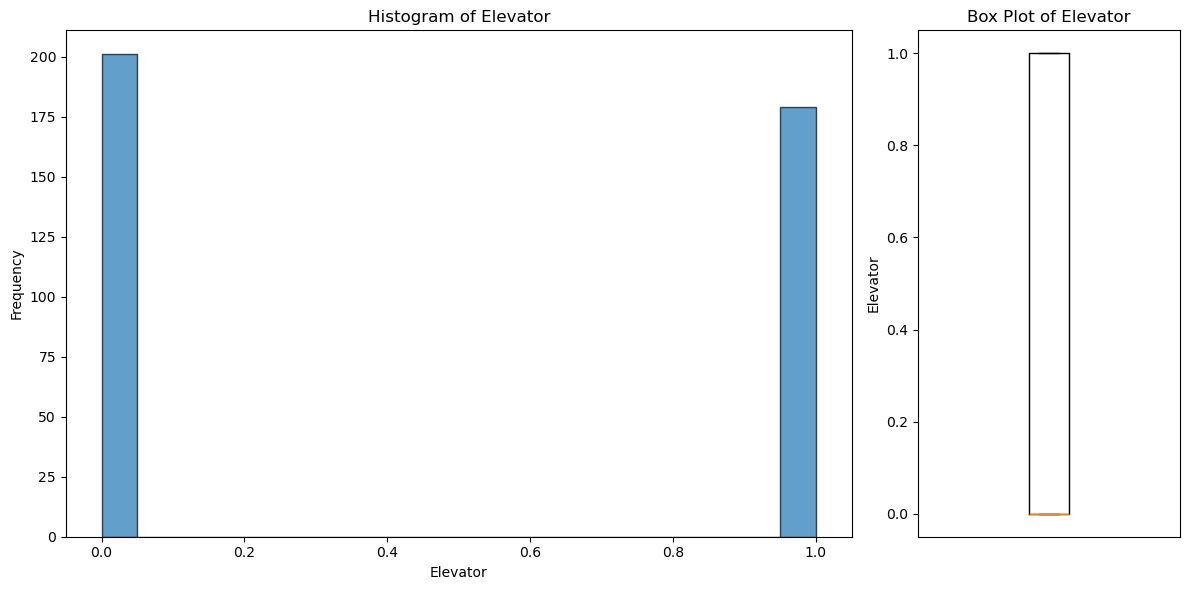

In [16]:
plot_feature_hist_box(df, 'Elevator')

**Comment**
<br> I am a bit surprised to see that we almost have as many apartments being sold *with* an `Elevator` in the house, compared to those that do *not*.
<br> I would expect to see few elevators since we have so many low-rise buildings built before 1950. 
<br> But looking at the histogram, we actually have the medium `Year of Building` at around 1945.
<br> And since amost half of the apartment built comes from after 2005, it's perhaps not surprising to see a lot of elevators. 
<br> We may also have seen new installation into older low-rises, where possible.

### 4.11 Balcony

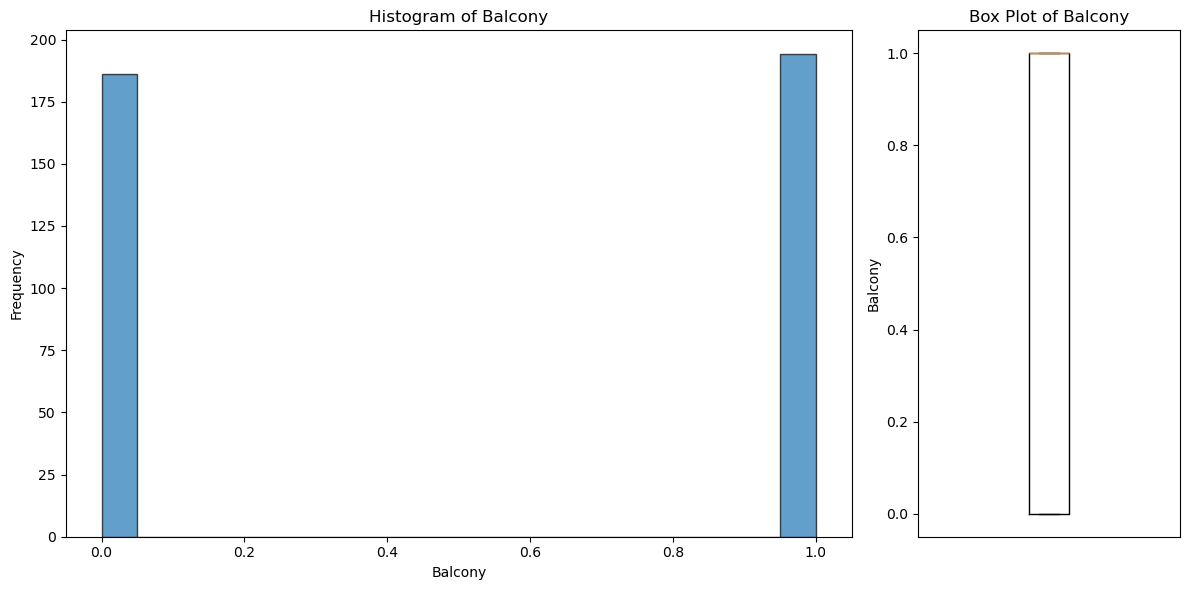

In [17]:
plot_feature_hist_box(df, 'Balcony')

**Comment**
<br> We see the same distribution pattern for `Balcony` as we did for `Elevator`, where almost all the apartments built after 2005 have a `Balcony`. 
<br> Added to this, we have a couple of selected balconies belonging to older houses.

### 4.12 Patio

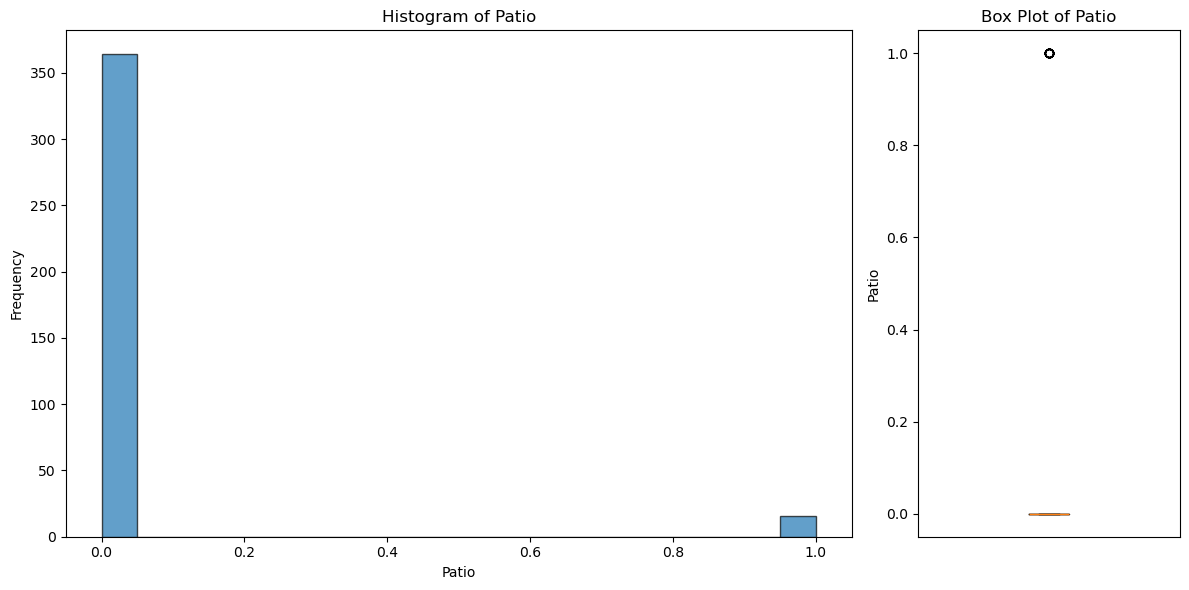

In [18]:
plot_feature_hist_box(df, 'Patio')

**Comment**
<br> There are few `Patio`s around, and those that do exist are generally located at the bottom `Floor`. 

### 4.13 Fireplace

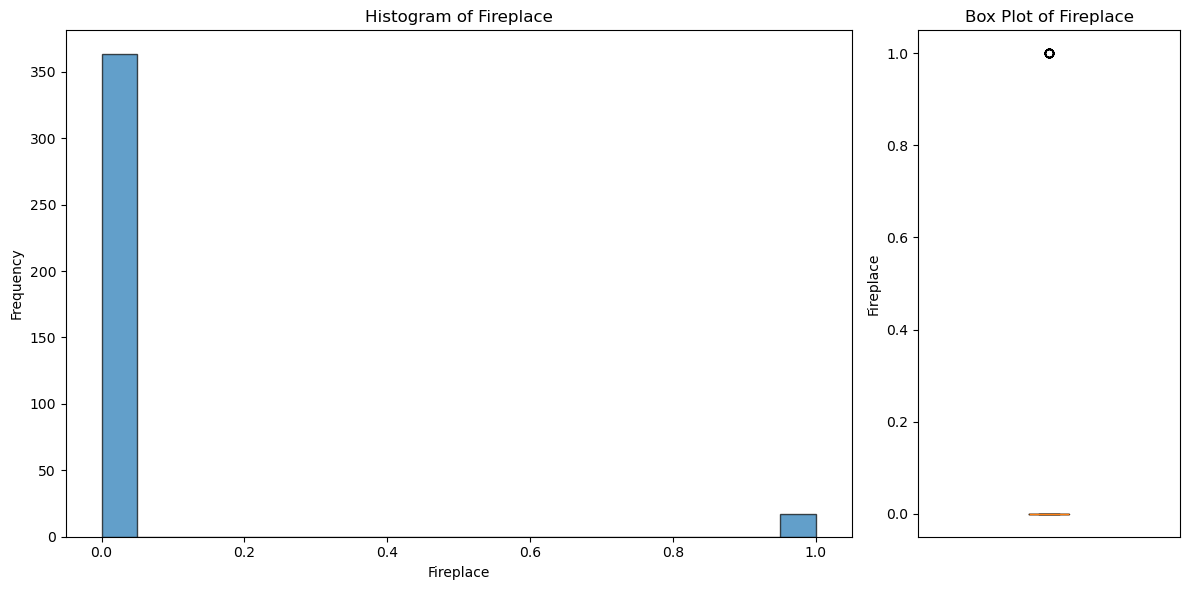

In [19]:
plot_feature_hist_box(df, 'Fireplace')

**Comment**
<br> Same situation as for `Patio`, we have very few ones. 
<br> Those that do exist, most likely belong to older buildings that relied on `Fireplace` for heating. 
<br> Newer apartments relies on radiators, which the older apartments also have nowadays. 

### 4.14 Days for Sale

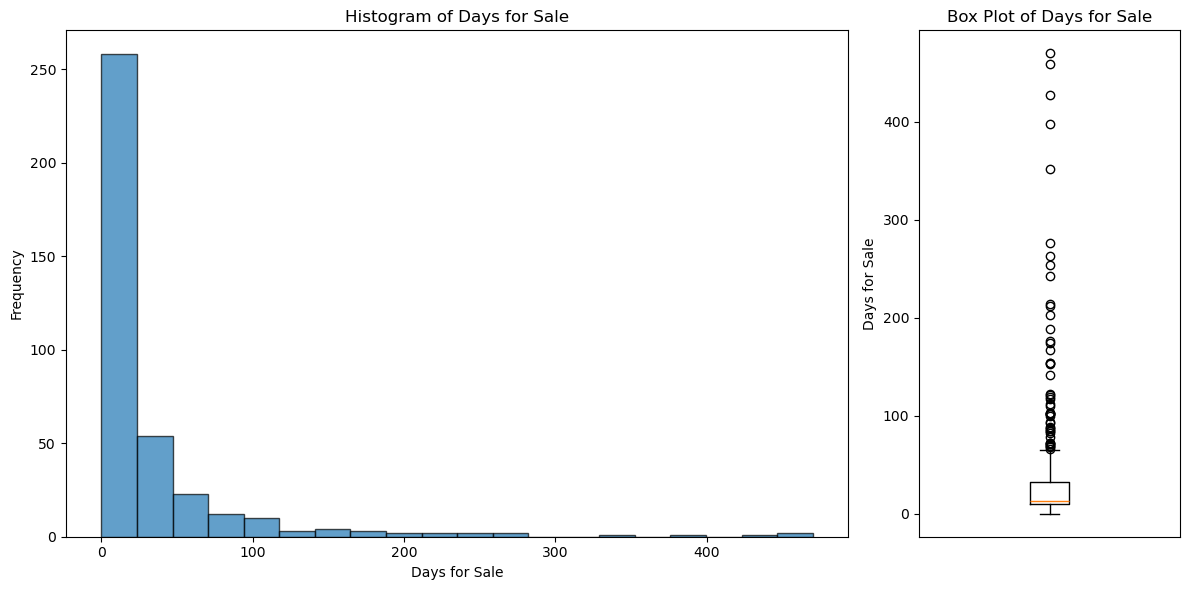

In [20]:
plot_feature_hist_box(df, 'Days for Sale')

**Comment**
<br> This distribution is positively skewed with the majority of apartments being less than about 25 days on the market.

## 5. Visualizing Correlations

### 5.1 Pairwise Correlation

We want to visualize dependencies that may exist between various features.

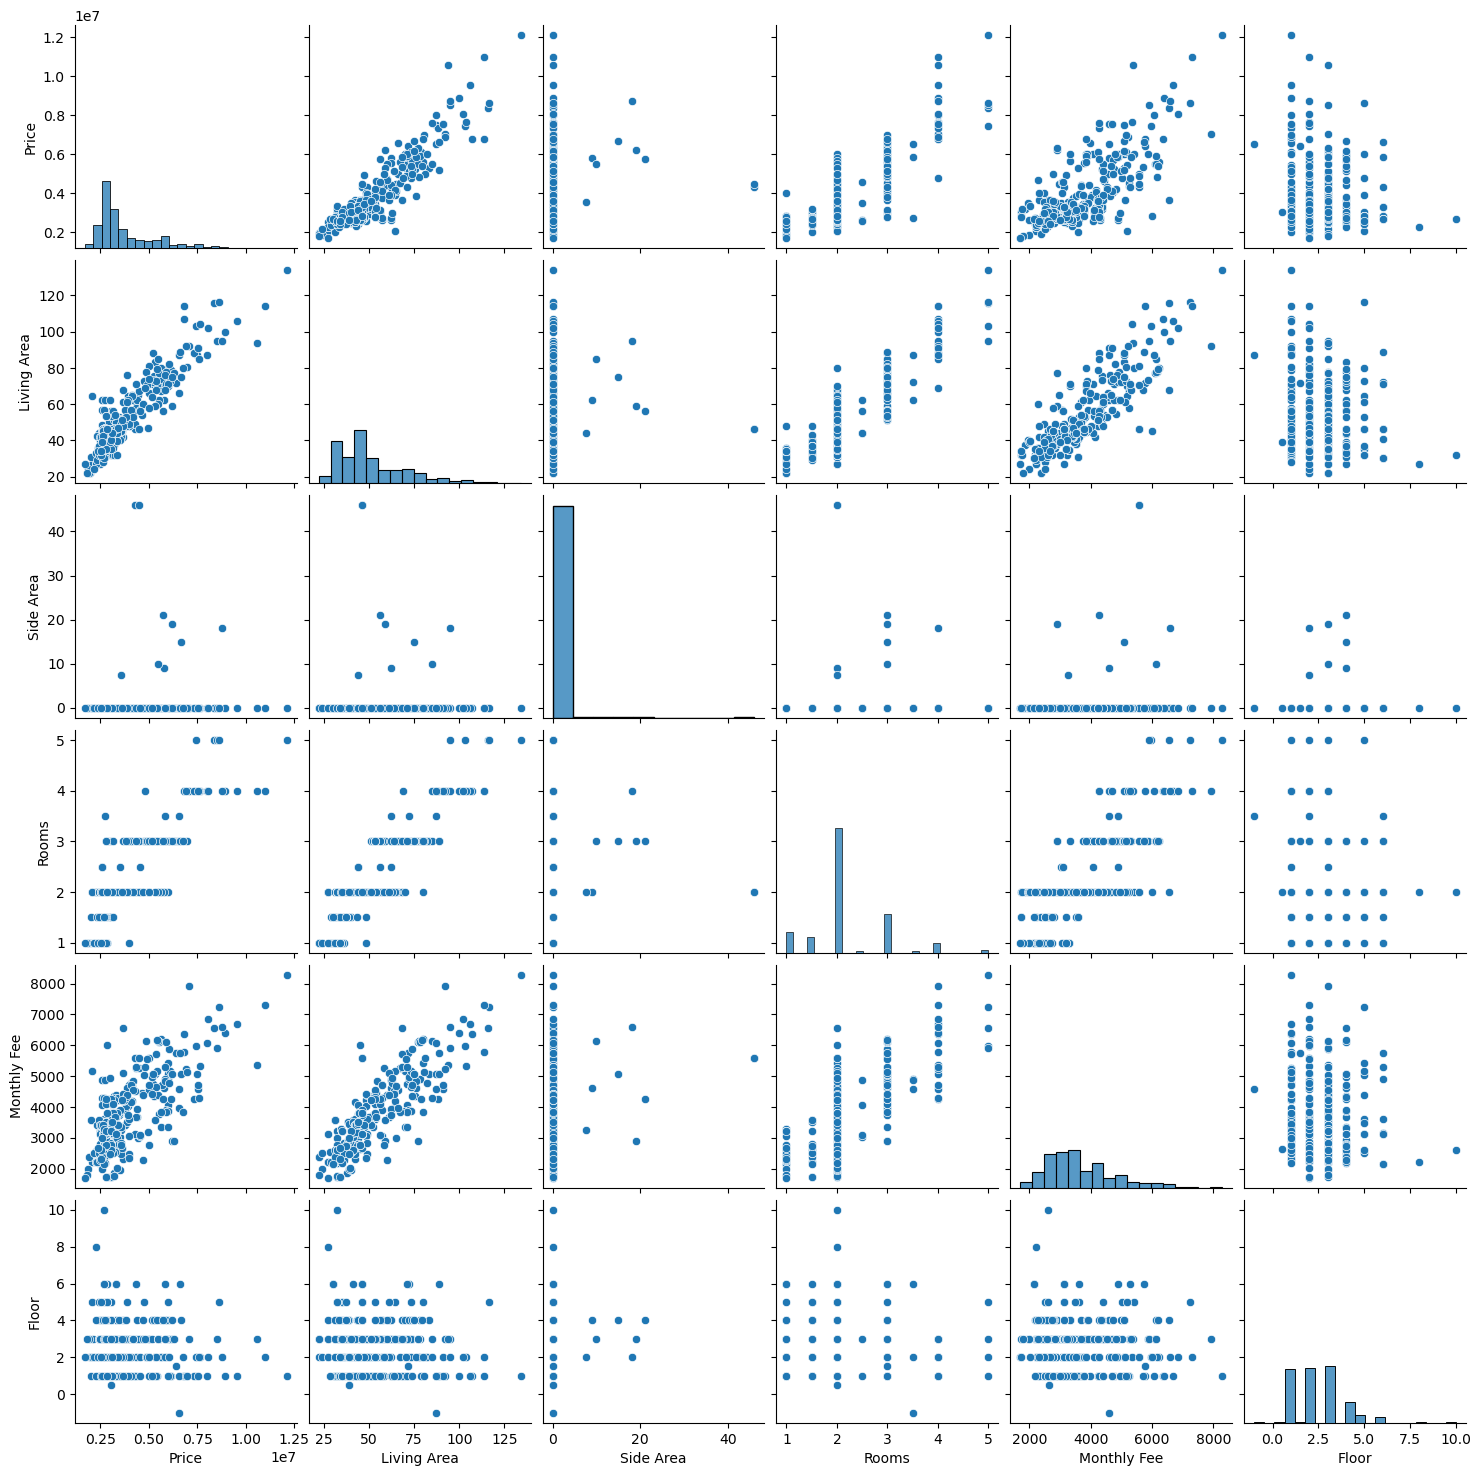

In [21]:
selected_columns = ['Price', 'Living Area', 'Side Area', 'Rooms', 'Monthly Fee', 'Floor']

# Create a DataFrame with only the selected columns
df_selected = df[selected_columns]

# Create pair plot using Seaborn
sns.pairplot(df_selected)
plt.show()

**Comment**
- We can see a strong pairwise positive correlation between `Price` and ´Living Area` as expected, since people are willing to pay more for a larger apartment.
- We can also see that we have a slightly lower, but still strong, positive correlation between `Price` and `Montly Fee`. The `Monthly Fee` is dependant on the size of the apartment (`Living Area`) and thus, `Price`. 
- Even though `Rooms` are a categorical value, there is a positive correlation with `Living Area`, since a larger apartment usually will have more `Rooms`. This will in turn correlate positively with both `Monthly Fee` and `Price`.
- `Floor`, being a categorical value, seems to be slightly negatively correlated to `Price`. This could be due to smaller apartments only being available in mid- and high-rise buildings. 

### 5.2 Multicollinearity Analysis

In [22]:
corr_matrix = round(df_selected.corr(),2)
corr_matrix['Price'].sort_values(ascending=False)

Price          1.00
Living Area    0.92
Rooms          0.82
Monthly Fee    0.74
Side Area      0.13
Floor         -0.06
Name: Price, dtype: float64

**Comment**
<br> As we can see, `Living Area` is strongly positively correlated (0.92) with `Price`.
<br> Further, `Rooms` is also strongly correlated to `Price`, due to more `Rooms` lead to a larger `Living Area`.
<br> And `Monthly Fee` shows a rather strong correlation to `Price`, due to `Monthly Fee` having a correlation to `Living Area`.
<br> `Side Area` is problematic due to the lack of values over 0.

<br> Let's look at a visualization.

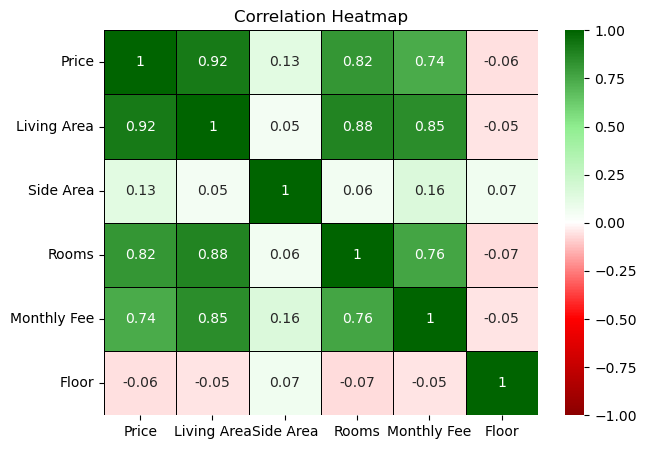

In [23]:
# Define a custom colormap from red (negative) to white (neutral) to green (positive)
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_cmap',
    ['darkred', 'red', 'white', 'lightgreen', 'darkgreen'],
    N=512  # Increased number of colors for smoother transitions
)

plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, center=0, vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

**Comment**
<br> So, as can be seen, we have a strong case of ***multicollinearity***, meaning several features being dependent and correlating with each other.
<br> According to ChatGPT-4o, ***multicollinearity*** can have negative consequences for linear regression models, such as:
- Unstable Coefficients
- Reduced Interpretability
- Increased Variance of Coefficients
- Insignificant Predictors
- Model Performance

When we enter the stage of Feature Engineering, we will want to make sure to improve any obvious features that may cause ***multicollinearity***. 
<br> For example, it would be nice to decouple `Rooms` or `Monthly Fee`, if possible. 
<br> Let's return to this in the notebook for Feature Engineering.

## 6. Heatmap Analysis

I want to see how `Floor` interacts with `District`. 

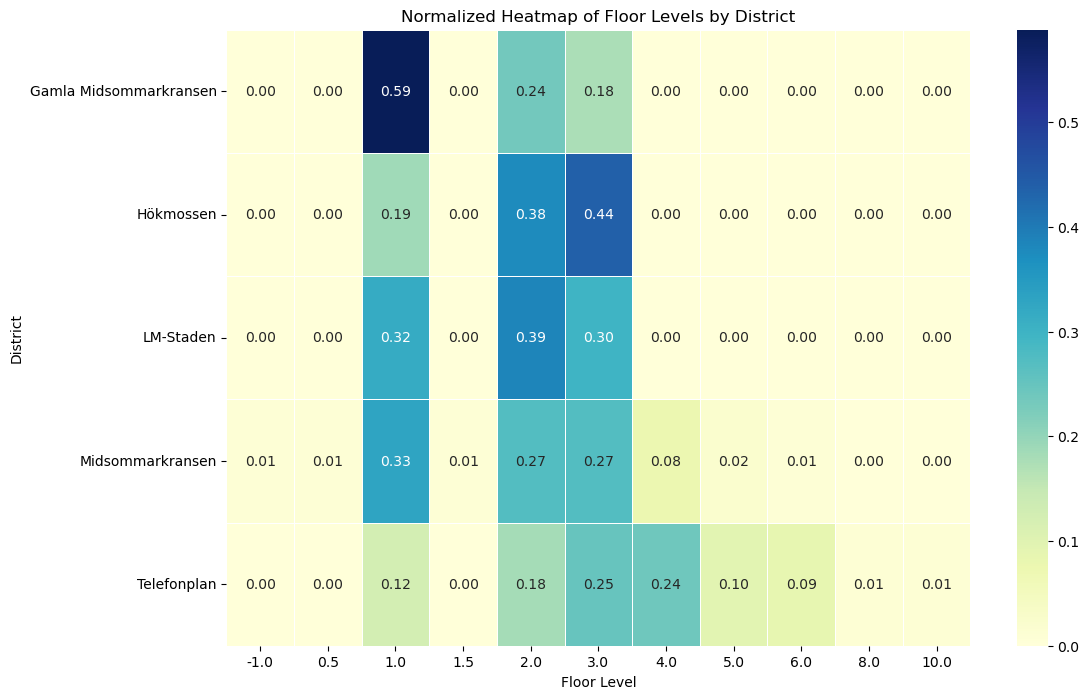

In [24]:
# Create a pivot table with 'District' as rows and 'Floor' as columns
pivot_table = pd.pivot_table(
    df,
    index='District',
    columns='Floor',
    aggfunc='size',
    fill_value=0
)

# Normalize by dividing each district's row by the total number of apartments in that district
normalized_pivot = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_pivot, cmap='YlGnBu', annot=True, linewidths=0.5, fmt='.2f')
plt.title('Normalized Heatmap of Floor Levels by District')
plt.xlabel('Floor Level')
plt.ylabel('District')
plt.show()


**Comment**
<br> I normalized the frequency values by dividing by the number of apartments in each district, since there was variation there.
- In 'Gamla Midsommarkransen', we can see that there are no mid- or high-rise buildings. Also, 1st Floor apartments are common there.
- In 'Hökmossen' and 'LM-Staden', we can see the same pattern concerning lack of mid- or high-rise buildings. Here, there is more of an even distribution of `Floor` 1, 2 and 3.
- The `District`,'Midsommarkransen', are similar to 'Hökmossen' and 'LM-Staden', but do have a few mid-rises within its `District`.
- In 'Telefonplan', we have an even distribution from `Floor` 1 through 6, with just 1% of its apartments having `Floor` 8 or 10.

In [25]:
df['Floor'].value_counts()

Floor
 3.0     99
 2.0     96
 1.0     94
 4.0     36
 5.0     13
 6.0     10
 1.5      1
 10.0     1
 8.0      1
 0.5      1
-1.0      1
Name: count, dtype: int64

**Comment**
<br> Since we have too few values of values 8 and 10, I will bin `Floor` in the categories 'Lo' (level 1-3), 'Mid' (4-5)  and 'High' (6+).
<br> Also, I will remove odd values of `Floor` and replace -1 with 1, 0.5 with 1, and 1.5 with 2.
<br> Also, since we have some strong interaction between `District` and `Floor` we will try and capture this in combined feature categories.

In [26]:
# Step 1: Change specific floor values
df['Floor'] = df['Floor'].replace({-1: 1, 1.5: 2, 0.5: 1})

# Step 2: Bin floor levels into categories
def bin_floors(floor):
    if 1 <= floor <= 3:
        return 'Lo'  # Low-rise
    elif 4 <= floor <= 5:
        return 'Mid'  # Mid-rise
    else:
        return 'Hi'  # High-rise

df['Floor_Category'] = df['Floor'].apply(bin_floors)

# Step 3: Combine District and Floor_Category
df['District_Floor'] = df['District'] + '-' + df['Floor_Category']

# Print the updated dataframe
print(df[['District', 'Floor', 'Floor_Category', 'District_Floor']])

                   District  Floor Floor_Category             District_Floor
0               Telefonplan    5.0            Mid            Telefonplan-Mid
1                 Hökmossen    NaN             Hi               Hökmossen-Hi
2                 LM-Staden    1.0             Lo               LM-Staden-Lo
3               Telefonplan    3.0             Lo             Telefonplan-Lo
4               Telefonplan    4.0            Mid            Telefonplan-Mid
..                      ...    ...            ...                        ...
375  Gamla Midsommarkransen    1.0             Lo  Gamla Midsommarkransen-Lo
376  Gamla Midsommarkransen    2.0             Lo  Gamla Midsommarkransen-Lo
377             Telefonplan    2.0             Lo             Telefonplan-Lo
378        Midsommarkransen    2.0             Lo        Midsommarkransen-Lo
379               LM-Staden    3.0             Lo               LM-Staden-Lo

[380 rows x 4 columns]


**Comment**
<br> We will use this step in the notebook Feature Engineering', but won't save the DataFrame to file at this moment.

## 7. Summary

In this initial Exploratory Data Analysis (EDA) and Visualization, we have discovered that we have:
- Categorical values
- Multicollinearity
- A main, strong positive correlation between `Living Area`and `Price`

**Comment**
<br> Let's move on to Feature Engineering to handle these issues.